# Matplotlib & Seaborn
* Matplotlib is data visualization tool
* Seaborn is statistical visualization tool
* See Matplotlib/Seaborn Part 1 (Univariate) for the inner workings of the platforms

# Bivariate 
* Plots representing the relationship between two variables measured on the given sample data. This is as opposed to Univariate visualizations which visualize single-variables, such as bar charts, histograms, and line charts & Multivariate visualizations which visualize more than 2 variables.

Bivariate Visualization Examples:
1. Scatterplots: quantitative variable vs quantitative variable
2. Violin plots: quantitative variable vs qualitative variable
3. Cluster bar charts: qualititative variable vs qualitative variable

### Faceting
* general visualization technique useful for handling plots of two or more variables
* data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. 
* Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

### Terms
* Ordinal data: It is a categorical data type where the variables have natural and ordered categories. The distances between the categories are unknown, such as the survey options presented on a five-point scale.
* Nominal data: variables are "named" with no specific order & thus can be sorted by frequency

Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# allows plots to be rendered inside the notebook
%matplotlib inline

In [3]:
# load data to work with
fuel_econ = pd.read_csv('./resources/fuel-econ.csv')
fuel_econ.head(10)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


# Scatterplots
* quantitative variable vs quantitative variable
 * standard choice of plot to inspect the relationship between two numeric variables
* each data point is plotted individually as a point resulting in a cloud of points
 * its x-position corresponding to one feature value and its y-position corresponding to the second
 
### Pearson Correlation Coefficient
* statistic quantifying the strength of linear correlation between two numeric variables
* identified by the letter r
* the statistic takes a value between -1 to 1. 
 * Positive numbers indicate a relationship where positive changes in one var are associated with positive changes in the second
 * Negative numbers indicate that when one var increases, the second tends to decrease
 * Numbers close to zero indicate a weak relationship while values close to the extremes of -1 or 1 indicate a stronger, more predictable relationship
* only captures linear relationships
* doesn't tell you anything about the steepness of a line that models the relationship since data can be plotted relative to what you're trying to convey, ie. using scale transformations

**Create Scatterplot with Matplotlib** <br>
* can add a diagonal line to the figure with the plot() function
* example showing negative correlation between two variables because as engine size(displ) increases, fuel efficiency(comb) decreases

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

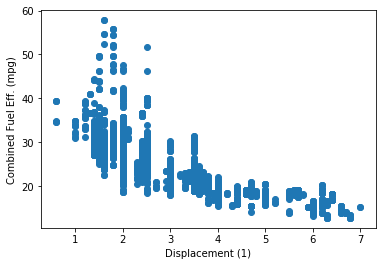

In [43]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
# plt.plot([0, 7], [60, 10]) # diagonal line from (0,60) to (7,10)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

**Create Scatterplot with Seaborn** <br>
* regplot() function combines scatterplot creation with regression function fitting
  * If we don't care about the regression line, then we could set fit_reg = False in the regplot function call.

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

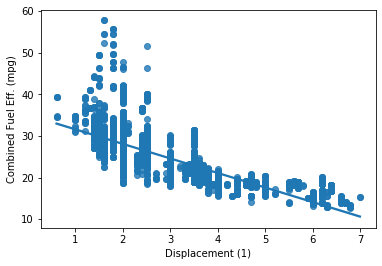

In [5]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

**Create Scatterplot on transformed data** <br>
Note: the x- and y- values sent to regplot are set directly as Series, extracted from the dataframe

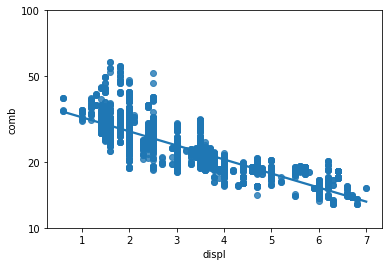

In [6]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

## Dealing with Overplotting
* where a plot is created with too many overlapping points or your numberic data might be discrete in nature, each making it difficult to see a distribution
* can be resolved with:
 * Sampling: random sampling to plot a smaller number of points
 * Transparency: each individual point is lighter in color while overlapping points become darker in color
 * Jitter: adds a small amount of random noise to the position of each point(move position of each point slightly from its true value) so that multiple points with the same values are spreak over a small area (helpful with discrete data points)

**Scatterplot using Jitter with Seaborn** <br>
Jitter is not a direct option in matplotlib's scatter() function, but is a built-in option with seaborn's regplot() function. The x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made.

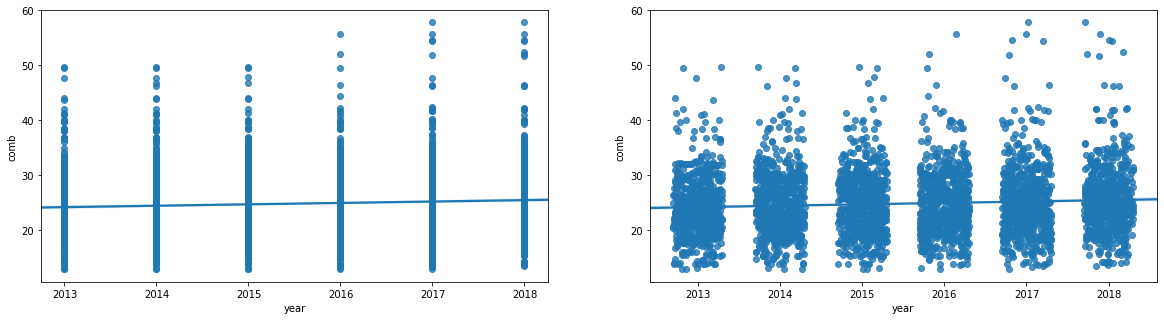

In [12]:
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])


# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);


# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3 (causing each point to be plotted in a uniform ±0.3 range of their true values)
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

**Scatterplot using Transparency & Jitter with Seaborn** <br>
* add the "alpha" arg to the scatter_kws param to set transparency to a value
 * value set between 0 (fully transparent, not visible) and 1 (fully opaque)

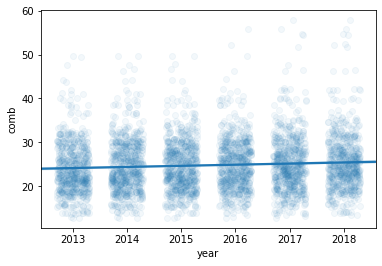

In [8]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

**Scatterplot using Transparency with Matplotlib** <br>
Matplotlib's scatter() function below does NOT have any argument to specify the Jitter

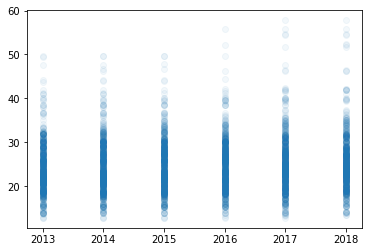

In [9]:
# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

# Heat Maps
* can be used for both 'quantitative vs quantitative' & 'qualitative vs qualitative'
* bivariate plot type that uses relationship between color & density of data
* field is divided into a grid of cells & number of data points in each cell is counted up & given a color based on the count of values. The more data points in a grid cell, the darker the color
 * helpful to add the count number on top of each cell for precision, like a table
* like a 2D version of histogram (where the cells are bins) looking at the data from a top-down perspective
 * also need to be aware of bin sizes
* quantitative vs quantitative like a scatterplot
 * favored over a transparent/jittered scatterplot when you have two discrete vars or large amount of data
* qualitative vs qualitative like a 2-D bar chart


**Create default Heat Map with Matplotlib** <br>
* default color palette is 'viridis'
* colorbar() function to add a colorbar to the side of the plot, showing the mapping from counts to color

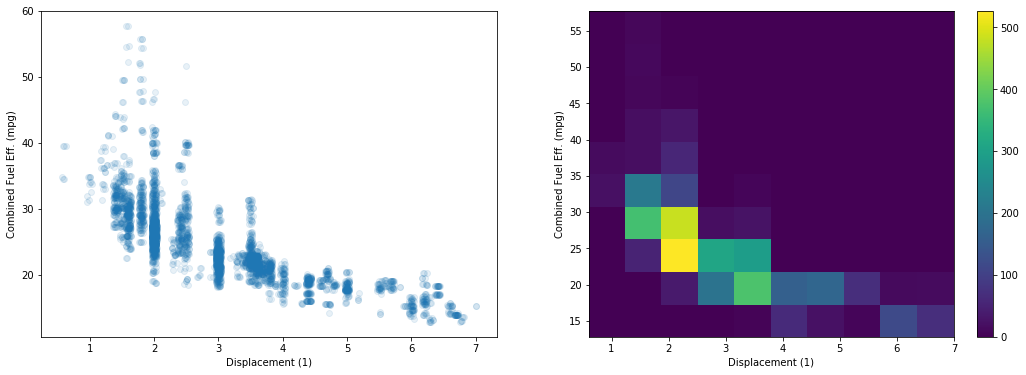

In [11]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT: Scatterplot, jittered & transparency
plt.subplot(1, 2, 1)
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT: Heat Map
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()  # to add a colorbar to the side of the plot, showing the mapping from counts to colors.
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

**Create custom Heat Map with Matplotlib** <br>
* To select a different color palette, you can set the "cmap" parameter in hist2d. 
 * The most convenient way is to set a string referencing a built-in Matplotlib palette
 * can reverse the palette by adding '_r' to the end of the string
* distinguish cells with zero counts from non-zero counts using the "cmin" param to higher than 0
* Specify bin edges in the bins param
* Add annotations on each cell by looping through the cells & adding text annotations
 * If too many cells in the heat map, annotations may be too overwhelming, too much to attend to & it may be best to avoid them
 * more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted (there's a parameter built into seaborn's heatmap() function for categorical heatmaps)

In [14]:
# view descriptive stats to decide bin edges
# displ=engine size, comb=combined fuel efficiency
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


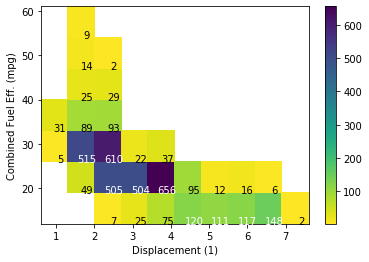

In [13]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

**Create Heat Map with Seaborn comparing 2 qualitative variables** <br>
* depicting the relationship between two categorical variables like a 2-D version of a bar chart (clustered bar 8 chart)
* instead of providing the original dataframe, need to summarize the counts into a matrix that will then be plotted.
* Seaborn's heatmap() has params for adding texting rather than having to loop through like with Matplotlib
 * annot = True makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. 
 * Adding fmt = 'd' means that annotations will all be formatted as integers instead. 
   * You can use fmt = '.0f' if you have any cells with no counts, in order to account for NaNs.

In [97]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


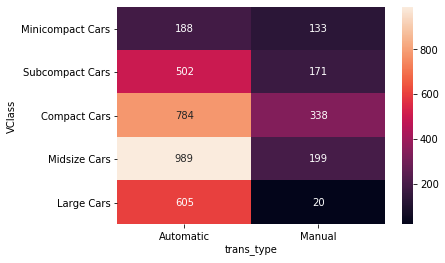

In [95]:
sb.heatmap(ct_counts, annot = True, fmt = 'd')

# Violin Plots
* quantitative variable vs qualitative variable
* instead of plotting data points individually, we have a curve for each level of the categorical variable whose area depicts the distribution of points
 * where the curve is wider, there are more data points
 * curve rather than scatterplot to indicate variable is categorical & easier to compare distributions 
* distribution is plotted as a kernel density estimate, something like a smoothed histogram or density curve turned on its side

**Create basic Violin Plot with Seaborn** <br>
Inside each curve, there is a black shape with a white dot inside, a miniature box plot (explained in the Box Plot section below)
* the white dot is the median
* the black box is the interquartile range (IQR)

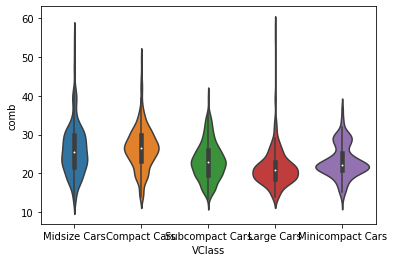

In [55]:
sb.violinplot(data=fuel_econ, x='VClass', y='comb');

**Create custom Violin Plot with Seaborn**
* custom order of categories by converting from an object type to an ordered categorical type so that the sorting of levels is automatic & won't need to set an order param in visualization calls
* inner param adjusts the box plot (details in following section)
 * =None to remove the mini box plots from the middles
 * ="box" to draw miniature bp
 * ="quartile" draws lines on the quartiles
* color param to adjust color to a specified palette
* xticks() to adjust x-axis tick label rotation

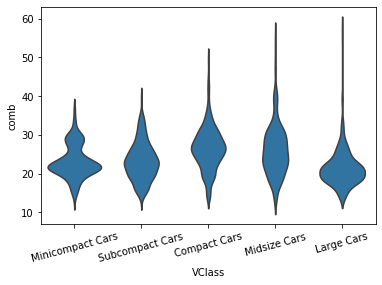

In [59]:
# Convert the "VClass" column from a plain object type into an ordered categorical type 
# Custom order of Sedan Types by size
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Get preferred color
base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner=None)
plt.xticks(rotation=15);

**Create horizontal Violin Plot** <br>
Seaborn is smart enough to make an appropriate inference on which orientation is requested, depending on whether "x" or "y" receives the categorical variable. But if both variables are numeric (e.g., one is discretely-valued) then the "orient" parameter can be used to specify the plot orientation.

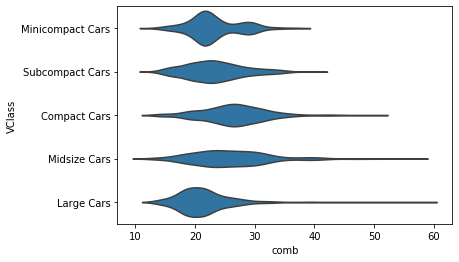

In [64]:
sb.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, inner=None);

**Create Violin Plot with Box Plot Quartiles** <br>
By setting inner = 'quartile', three lines will be plotted within each violin area for the three middle quartiles. The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.

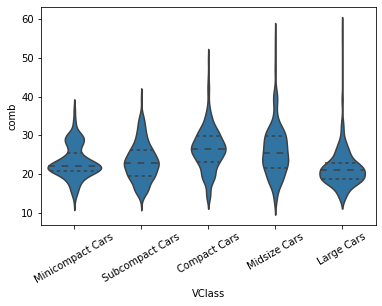

In [70]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);

# Box Plot
* quantitative vs qualitative alternative to violin plot
* compute descriptive statistics within each level to depict them graphically using a box & whiskers where 25% of the data falls between each set of horizontal lines
 * the central line in each box is the median of the data (Q2)
 * the lower & upper edges of the box, indicate the 1st & 3rd Quartiles, respectively
   * the height of the box is the interquartile range (IQR)
 * the lower & upper whiskers indicate the min(Q0) & max(Q4), respectively
   * typically, a maximum range is set on whisker length; by default, this is 1.5 times the IQR
     * so the taller the box, the wider the whiskers can be
   * often have outliers plotted as points beyond the ends of the whiskers
* there are some distributional details that can get lost like bimodalities & plateaus that can be seen with violin plots
 * alternative approach is to start with a violin plot & then add lines to the curves to denote quartile points, but this is less direct than box plot so for explanitory visualization, box plot may be better for simplicity & focus

**Create Box Plot with Mpl & Sb** <br>
In order to provide a better comparison of the violin and box plots, a ylim expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by violinplot() is assigned to a variable, ax1 is used to programmatically obtain those limit values.

(6.966470319355814, 63.09321945242605)

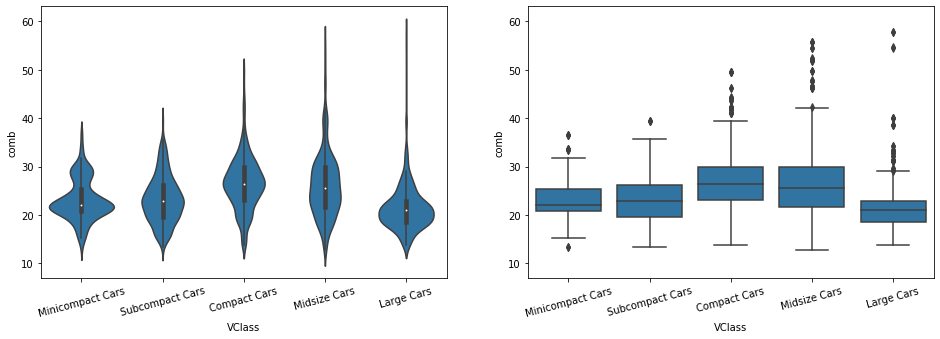

In [71]:
# Optional: Convert the "VClass" column from a plain object type into an ordered categorical type 
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
# Returns the types for sedan_classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Optional: get color for customizing
base_color = sb.color_palette()[0]


# TWO PLOTS IN ONE FIGURE for comparison
plt.figure(figsize = [16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, innner='quartile')
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

# Clustered Bar Charts
* qualitative variable vs qualitative variable vs quantitative
* two or more bars per tick depicting each categorical variable per cluster on the x-axis & counts on the y-axis
 * typically apply a color encoding to each bar in each cluster to differentiate between categories
* can also use a heat map but clustered bar chart might be easier to discern
* may require prepatory steps to format the data for plotting & readability

**Create Clustered Bar Chart** <br>
1. Prep data
2. Add an additional categorical column using 'hue' param in Seaborn's countplot() function
3. Customize legend (optional): default is in upper right quadrant (3)

In [72]:
# reset order of car type based on size 
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
# The existing `trans` column has multiple sub-types of Automatic and Manual. 
# But, we need plain two types, either Automatic or Manual. Therefore, add a new column. 
# The Series.apply() method invokes the `lambda` function on each value of `trans` column.
# In python, a `lambda` function is an anonymous function that can have only one expression.
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

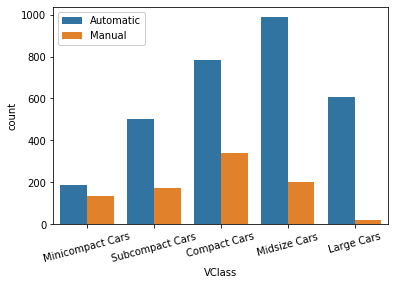

In [105]:
# save plot in var if what to alter legend
ax = sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
# legend in upper left quad with no transparency
ax.legend(loc = 2, framealpha = 1) 
plt.xticks(rotation=15)

**Create Clustered Bar Chart with Specific Values** <br>
Useful for omitting outlier values

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

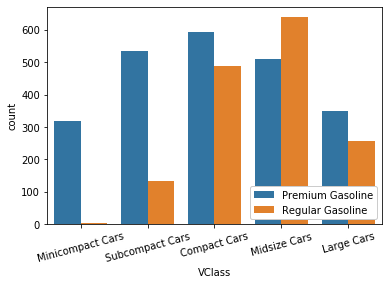

In [106]:
# use .loc to grab column & .isin() to pick out only the values we want
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

# plotting
ax = sb.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType')
ax.legend(loc = 4, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15)

# Facet Grids
* faceting is a technique for breaking down potentially complex patterns into simpler parts by creating multiple copies of the same type of plot that are visualized on different subsets of the data 
 * especially useful for a categorical variable with a lot of levels
* can visualize many types of plots in this way
 * clustered bar chart -> a set of side-by-side univariate bar charts
 * violin plot -> a set of histograms faceted by a categorical variable
* axis scales & limits should be consistent across each subplot so as not to have misconceptions about overall frequency or value range for each subset of the data

**Create Facet Grid with Seaborn** <br>
1. Plot Seaborn FacetGrid
 1. 1st param is data
 2. 2nd param is the column to be faceted
    1. a plot is made for each level of that category (there are 5 sedan types in VClass)
    2. axis limits on each facet are the same to allow clear and direct comparisons between groups
 3. col_wrap param limits # of plots placed side by side (thus creating a grid)
 4. sharey=False param allows each facet to have it's own y-axis limits
    1. may be easier to see change in distribution across levels, but difficult to see overall frequency of each group which may lead to misconceptions if you're not looking closely at the y-axis differences
 5. col_order for category order
2. Add data with map() method: set the plotting function and variable to be plotted as positional arguments. 
 1. 1st param is plotting function for type of plot 
    1. While axis limits are the same for each, bin sizes differ (For histograms, each uses the default of 10 bins causing each plot to have a different bin size) & thus will need to be adjusted using the bins param
 2. 2nd param is variable to be plotted on x-axis
    1. Don't set them as keyword arguments, like x = "comb", or the mapping won't work properly.
 3. bins arg so that bins across each facet are the same
 4. Extra visualization parameters can be set as additional keyword arguments to the map function.

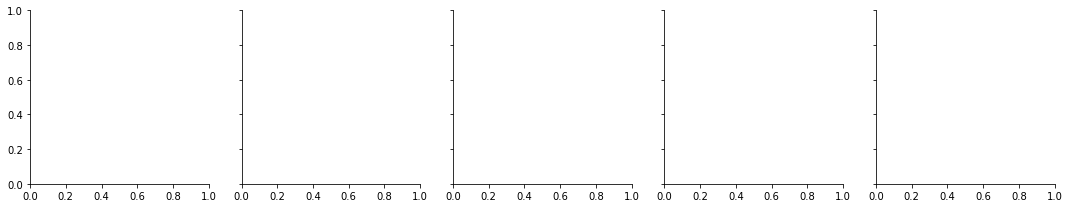

In [110]:
# Plot the Seaborn FacetGrid
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')

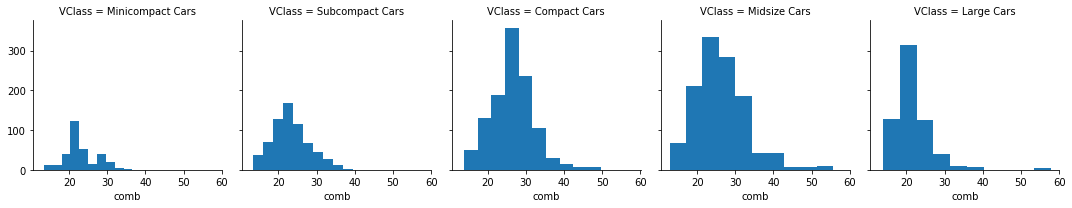

In [121]:
# Plot the Seaborn FacetGrid
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')  

# Add the data with map method
# While axis limits are the same, bins are different sizes due to hist default bin size of 10
g.map(plt.hist, "comb") # do NOT set x param

In [126]:
# Make bin sizes uniform

print(fuel_econ['comb'].describe())

# can hardcode bin edges
# bin_edges = np.arange(12, 58+2, 2)

# or use dynamic bin edges
bin_edges = np.arange(fuel_econ['comb'].min(), fuel_econ['comb'].max()+2, 2)

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64


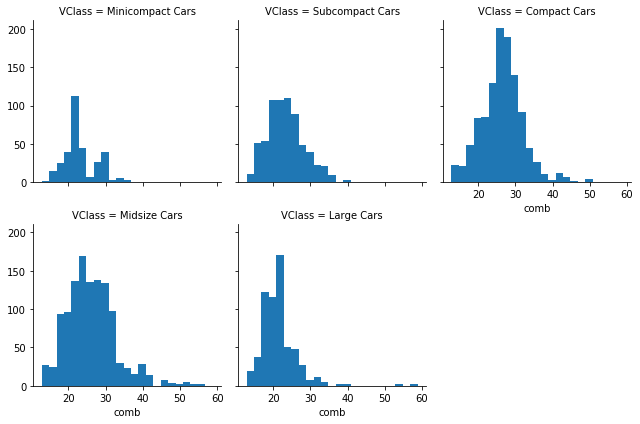

In [128]:
# Customize bins, grid, & axis limits

# sharey=False will have independent axis limits
# g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3)
g.map(plt.hist, 'comb', bins = bin_edges);

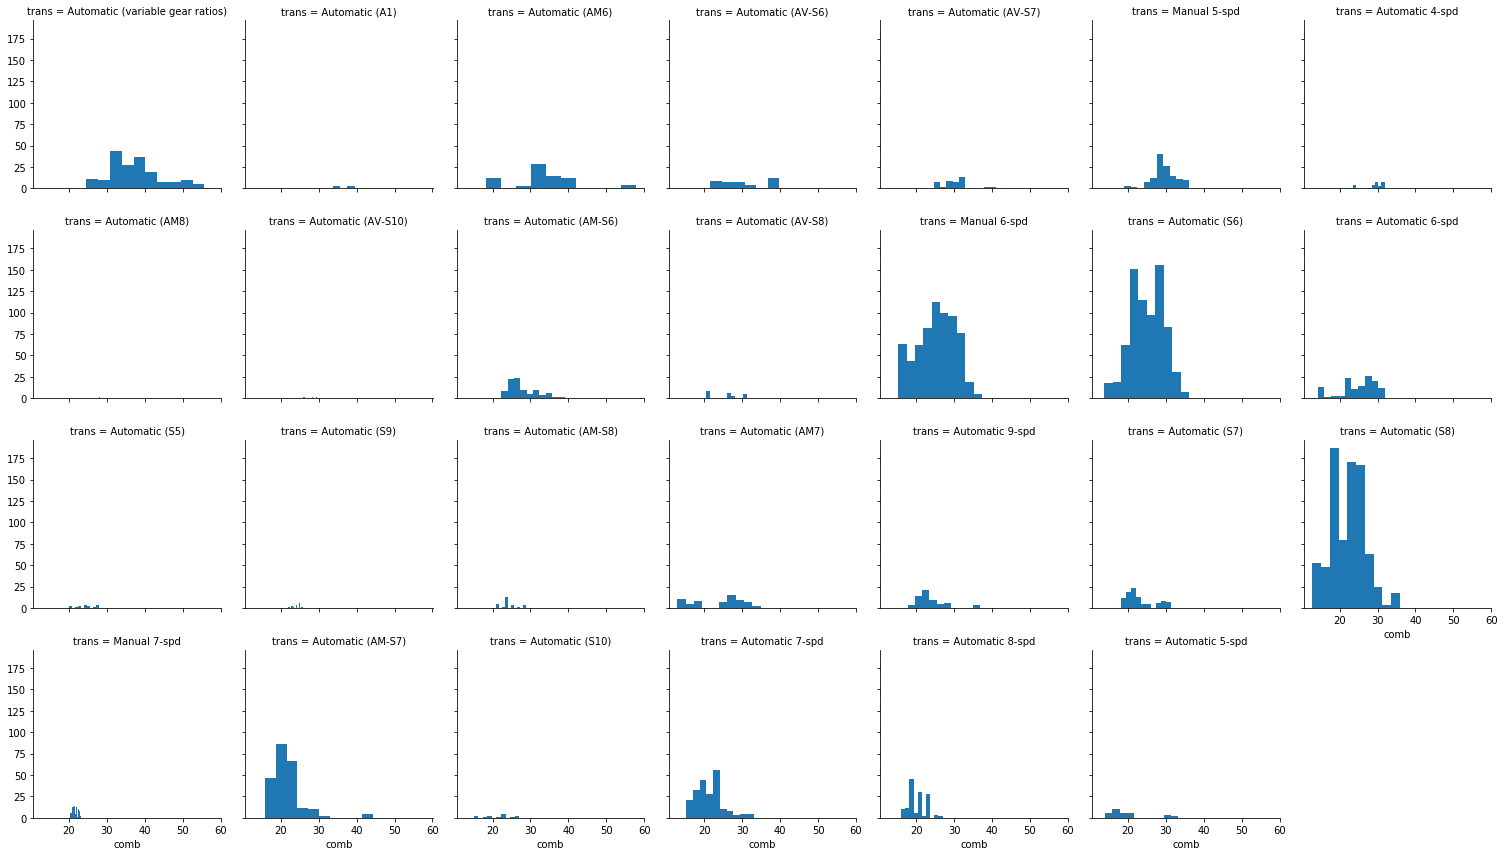

In [129]:
# Find the order in which you want to display the Facets

# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')

# Adaptation of Univariate Plots
Univariate plots like Histograms and Bar Charts can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.
* Matplotlib's hist() function can also be adapted so that bar heights indicate value other than a count of points through the use of the "weights" argument.

## Adapted Bar Chart
* used to focus on a particular statistic
* plots relationship between qualitative & quantitative variables
* useful alternatives to the box/violin plot if the data is not conducive to either of those plot types. 
 * e.g. if the numeric variable is binary in nature, taking values only of 0 or 1, then a box plot or violin plot will not be informative, leaving the adapted bar chart as the best choice for displaying the data

**Create Adapted Bar Chart Showing the Mean with barplot()** <br>
* baseline of 0, just like a univariate bar chart
* bar heights indicate the mean value on the numeric variable
* error whiskers (black lines on each bar) plotted to show the uncertainty in the mean based on variance and sample size
 * errwidth=0 will remove them
 * ci='sd' changes the whiskers to standard deviation

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

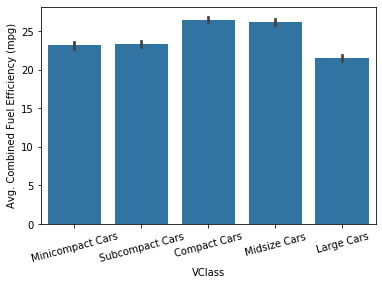

In [131]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)

# errwidth=0 removes error whiskers
# sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)

# ci='sd' changes whiskers to standard deviation
# sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')

plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

**Create Adapted Bar Chart with points instead of bars** <br>
* useful if you don't want a baseline of zero
* connects point values with a line by default
 * fine if the categorical variable is ordinal in nature, but it can be a good idea to remove the line via linestyles = "" for nominal data

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

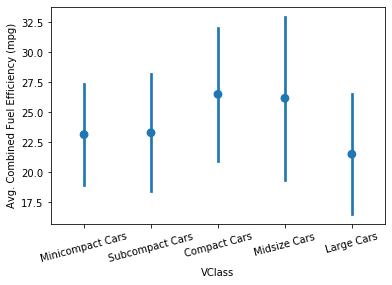

In [133]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

## Line Plots (Adapted Histograms)
* condensed alternative to the scatterplot, where only one point is plotted for every unique x-value or bin of x-values (like a histogram) & those points are connected by a line
 * if there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin
* use of a line emphasizes relative change & trends on the x-axis
 * inappropriate to use line plot with a nominal variable on the x-axis
 * frequently plotted against a time-based variable on the x-axis, called a Time Series Plot
* unnecessary to have 0 as a baseline

**Create Line Plot with Matplotlib** <br>
Prep work required before using errorbar() function

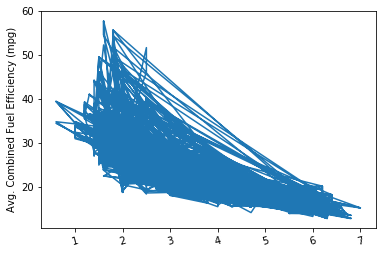

In [134]:
# errorbar function without prep work just plots all the data points as a line, connecting values from the first row of the dataframe to the last row
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]


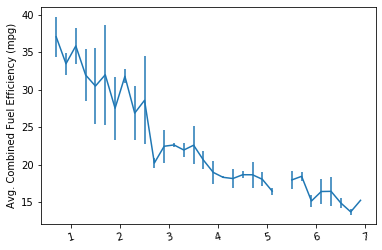

In [144]:
# Set a number of bins into which the data will be grouped using min & max from describe() method
bin_edges = np.arange(0.6, 7+0.2, 0.2)
# get center for each bin by dividing bin width(0.2) in half(0.1) & adding it to each beginning bin edge (except the last)
bin_centers = bin_edges[:-1] + 0.1

# cut() functions turns numberical data into categorical data by grouping data as is specified in the 2nd param
# the bin_edges are turned into Category types & values are assigned into each one. 
# Returns a Series object of the indices & Category names (depicted as bin edges with round/square brackets known as open&closed intervals in Math)
# actual column values are not listed but are present
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
print(displ_binned)  # interval values having beginning round bracket & ending square bracket, e.g. (1.903, 34.333], means any value on the side of the round bracket is not included in the interval and any value on the side of the square bracket is included (It is known as open and closed intervals in Math)

# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

**Alternate Variation waiting on Udacity Support**

In [145]:
# compute statistics in a rolling window
df_window = df.sort_values('num_var1').rolling(15)
x_winmean = df_window.mean()['num_var1']
y_median = df_window.median()['num_var2']
y_q1 = df_window.quantile(.25)['num_var2']
y_q3 = df_window.quantile(.75)['num_var2']

# plot the summarized data
base_color = sb.color_palette()[0]
line_color = sb.color_palette('dark')[0]
plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('num_var1')
plt.ylabel('num_var2')

NameError: name 'df' is not defined